<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#38B2FF" size=24px>
                    <b> Predictive Analytics for Healthcare Resource Allocation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<br>




### Case Study: Predictive Analytics for Healthcare Resource Allocation

This case study provides an opportunity for an experienced Data Scientist to showcase their expertise in working with healthcare data, developing complex predictive models, and delivering impactful solutions to enhance operational efficiency and resource management in the healthcare industry.

#### Background
The Health EMR company provides a comprehensive electronic medical records system used by healthcare providers. The company has access to a vast amount of anonymized patient health data, including medical histories, diagnoses, treatments, and resource utilization patterns. The data science team aims to leverage this data to develop predictive models that can forecast future resource demands and enable proactive planning and allocation. The goal is to improve patient outcomes, enhance operational efficiency, and optimize resource utilization across healthcare facilities.

#### Tasks
1. **Data Preprocessing and Integration**:
    - Preprocess and integrate the patient health records, resource utilization data, and demographic information.
    - Handle missing values, standardize data formats, and ensure data privacy and security.

2. **Feature Engineering**:
    - Extract relevant features from the patient health records and demographic data to enable accurate resource demand predictions.
    - Transform raw clinical data, aggregate time-series information, incorporate temporal factors, and consider patient-specific characteristics.

3. **Resource Demand Prediction**:
    - Develop predictive models that can forecast resource demands at different healthcare facilities.
    - Utilize machine learning techniques such as regression, time series analysis, or deep learning to predict future resource utilization based on historical patterns and patient attributes.
    - Evaluate the models using appropriate metrics and fine-tune them for optimal performance.

4. **Resource Allocation Optimization**:
    - Optimize the allocation of healthcare resources based on the predictions from the resource demand models.
    - Develop algorithms or decision support tools that consider available resources, service levels, geographical factors, and patient needs to allocate resources efficiently and minimize bottlenecks.
    - Incorporate constraints and objectives from healthcare providers and stakeholders.

5. **Model Interpretability and Explainability**:
    - Ensure the developed models are interpretable and explainable to healthcare professionals and stakeholders.
    - Provide insights into the key factors driving resource demands and highlight any actionable recommendations for resource optimization.

6. **Deployment and Monitoring**:
    - Implement the predictive analytics model into the Health EMR system to provide real-time resource demand predictions.
    - Establish monitoring mechanisms to track model performance, detect anomalies, and update the models periodically as new data becomes available.


# 1 Enviroment Setup
The Modules used for this case study.

In [1]:
# Standard
import pandas as pd
import numpy as np
import os
# Pycaret
import mlflow
from ydata_profiling import ProfileReport
from pycaret.regression import *
# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
# Extras
from datetime import date

import warnings
warnings.filterwarnings("ignore")
# Datapath and Setup
# os.chdir("..")
PATH = "./dataset"
RANDOM_SEED = 142
K_FOLDS = 5

# 2. Loading Data

The dataset is loaded as a Pandas dataframe and a glimpse of the data is shown.

In [2]:
# Load the datasets
hospital_visits = pd.read_csv(f'{PATH}/Patient_Hospital_Visit.csv')
patient_demo = pd.read_csv(f'{PATH}/Patient_Demo.csv')

In [3]:
# Display the first few rows of hospital_visits dataset to understand their structure
hospital_visits.head()

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,4850e9c9-2945-4087-b4f9-6c302e44b84e,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,f7427dbb-e87d-4ed2-b168-136c244596b2,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital


In [4]:
# Display the first few rows of patient_demo dataset to understand their structure
patient_demo.head()

,institution_id,patient_id,dob,sex,state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,Ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,Cross River State
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,Akwa Ibom


In [5]:
# Merge the datasets on patient_id
merged_data = pd.merge(hospital_visits, patient_demo, on='patient_id', how='left')

In [6]:
# Retain only one institution_id
merged_data['institution_id'] = merged_data['institution_id_x'].combine_first(merged_data['institution_id_y'])

# Drop the redundant institution_id columns
merged_data.drop(columns=['institution_id_x', 'institution_id_y'], inplace=True)

In [7]:
merged_data.shape

(448604, 12)

In [8]:
# Display the first few rows of the integrated dataset
merged_data.head()

,visit_id,patient_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type,dob,sex,state,institution_id
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,1928-06-01,female,kano,4850e9c9-2945-4087-b4f9-6c302e44b84e
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,1981-07-05,female,Ogun,b05bec66-9c3b-4381-9ad2-0636481ca919
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,2018-12-27,female,Ogun,b05bec66-9c3b-4381-9ad2-0636481ca919
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,1987-09-25,female,Ekiti,f7427dbb-e87d-4ed2-b168-136c244596b2
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,1990-07-02,female,ekiti,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7


In [9]:
# merged_data.to_csv(f'{PATH}/merged_data.csv', index=False)

# 3 Dataset Overview

In [9]:
profile = ProfileReport(merged_data, title="Profiling Report")

In [10]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Key Insights from the Report

**Duplicate Rows:**
- The dataset contains 4 duplicate rows (<0.1%), which need to be addressed to ensure data quality.

**Imbalanced Data:**
- `visit_type` and `type` are highly imbalanced:
    - `visit_type`: 75.7% dominated by a single category.
    - `type`: 74.2% dominated by a single category.
- Imbalances may impact model predictions and require balancing techniques during preprocessing.

**High Missing Values:**
- Key columns with significant missing data:
    - `admitted_at` and `discharged_at`: 96% missing values each.
    - `state`: 25.7% missing values.
- `admitted_at` and `discharged_at` are specific to in-patient visits, which appear limited.

**Correlations:**
- Minimal correlation between key variables (`visit_type`, `type`, and `sex`), suggesting limited direct relationships.
- Highlights the need for feature engineering to extract meaningful relationships.

**Nullity Overview:**
- Most columns have high completeness except for `state`, `admitted_at`, and `discharged_at`.

### Next Steps
1. Handle Duplicate Rows
2. Address Missing Values
3. Handle Outliers
4. Normalize or Scale Numerical Features
5. Feature Engineering
6. Encode Categorical Variables
7. Handle Date-Time Features
8. Drop Irrelevant or Low-Variance Columns

# 4 Data Cleaning and Pre-processing

### Handle Duplicate Rows

In [9]:
print(f"Number of duplicate rows before: {merged_data.duplicated().sum()}")
merged_data = merged_data.drop_duplicates(keep='first')
print(f"Number of duplicate rows after: {merged_data.duplicated().sum()}")

Number of duplicate rows before: 4
Number of duplicate rows after: 0


### Address Missing Value for state and cleaning

In [10]:
merged_data['state'] = merged_data['state'].fillna('Unknown')
# List unique values of 'state' and their counts
state_counts = merged_data['state'].value_counts()

# Display the unique values and their counts in an appealing way
print("Unique values of 'state' and their counts:")
for state, count in state_counts.items():
    print(f"{state}: {count}")

Unique values of 'state' and their counts:
Unknown: 115068
LAGOS: 39312
Lagos: 33916
AKS: 18351
lagos: 14813
kano: 13144
Akwa Ibom: 12538
KANO: 10814
Ogun: 10359
delta: 9762
ogun: 8265
Delta: 6854
Oyo: 6773
DELTA: 6659
OYO: 6142
oyo: 5447
IMO: 5083
OGUN: 5003
Lagos State: 4958
Aks: 4856
Enugu: 4106
ENUGU: 3977
FCT: 3975
ONDO: 3906
aks: 3850
AKWA IBOM: 3796
Kano: 3558
LAGOS STATE: 3471
ANAMBRA: 3442
EDO: 2422
OSUN: 2419
kwara: 2274
ondo: 2014
RIVERS: 1922
Anambra: 1895
delta state: 1697
imo: 1678
ABIA: 1659
Kwara: 1654
Imo: 1621
osun: 1548
Edo: 1492
lagos state: 1437
EKITI: 1327
Ondo: 1302
akwa ibom: 1275
KOGI: 1137
south south: 1003
ABUJA: 918
KWARA: 913
Osun: 887
edo: 886
anambra: 882
F.C.T: 824
Ekiti: 764
fct: 755
Akwa Ibom State: 749
Abia: 729
ogun state: 659
enugu: 654
kogi: 642
Abuja: 629
CROSS RIVER: 616
kaduna: 612
Kogi: 612
Ogun State: 610
KADUNA: 601
Benue: 600
ekiti: 595
BENUE: 584
CROSS RIVER STATE: 550
jigawa: 548
Akwa ibom: 520
AKWA IBOM STATE: 507
Ebonyi: 483
abia: 466
ab

Due to the state column containing invalid values (e.g., addresses, misspellings, unrelated entries) and a high number of unique values, we need to reduce the dimensionality of the unique values by separating them into regions. However, before that, we need to handle dirty state data before separating them into regions.

In [11]:
valid_states = [
    'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno',
    'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Gombe', 'Imo', 'Jigawa',
    'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger',
    'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara',
    'FCT'
]

In [12]:
from rapidfuzz import process
# Fuzzy match function
def correct_state(state, valid_states):
    # Match state to the closest valid state
    match = process.extractOne(state, valid_states, score_cutoff=70)  # 80% similarity threshold
    if match:
        return match[0]  # Return the matched state
    return 'Unknown'  # If no match, return 'Unknown'

# Apply correction
merged_data['state'] = merged_data['state'].apply(lambda x: correct_state(x, valid_states))


In [14]:
# Check the distribution of states after correction
print(merged_data['state'].value_counts())

Unknown        268870
Lagos           55978
Akwa Ibom       20752
Ogun            19426
Delta           18716
Kano            16759
Oyo              7315
FCT              4896
Enugu            4826
Kwara            4391
Ondo             3409
Anambra          2975
Osun             2557
Imo              1958
Edo              1627
Ekiti            1437
Kogi             1296
Rivers           1093
Benue            1081
Kaduna            959
Cross River       932
Abia              791
Ebonyi            740
Jigawa            712
Niger             669
Taraba            651
Borno             582
Katsina           516
Yobe              427
Nasarawa          391
Gombe             360
Bauchi            338
Adamawa           300
Plateau           228
Kebbi             203
Sokoto            156
Bayelsa           142
Zamfara           141
Name: state, dtype: int64


In [15]:
# Mapping of states to regions
state_to_region = {
    'Abia': 'South-East', 'Adamawa': 'North-East', 'Akwa Ibom': 'South-South',
    'Anambra': 'South-East', 'Bauchi': 'North-East', 'Bayelsa': 'South-South',
    'Benue': 'North-Central', 'Borno': 'North-East', 'Cross River': 'South-South',
    'Delta': 'South-South', 'Ebonyi': 'South-East', 'Edo': 'South-South',
    'Ekiti': 'South-West', 'Enugu': 'South-East', 'Gombe': 'North-East',
    'Imo': 'South-East', 'Jigawa': 'North-West', 'Kaduna': 'North-West',
    'Kano': 'North-West', 'Katsina': 'North-West', 'Kebbi': 'North-West',
    'Kogi': 'North-Central', 'Kwara': 'North-Central', 'Lagos': 'South-West',
    'Nasarawa': 'North-Central', 'Niger': 'North-Central', 'Ogun': 'South-West',
    'Ondo': 'South-West', 'Osun': 'South-West', 'Oyo': 'South-West',
    'Plateau': 'North-Central', 'Rivers': 'South-South', 'Sokoto': 'North-West',
    'Taraba': 'North-East', 'Yobe': 'North-East', 'Zamfara': 'North-West',
    'FCT': 'North-Central'
}

In [16]:
# Map state to region
merged_data['region'] = merged_data['state'].map(state_to_region)

# Handle cases where state is 'Unknown' or missing
merged_data['region'] = merged_data['region'].fillna('Uncategorized')


In [17]:
# Group by region and count visits
region_visit_counts = merged_data.groupby('region')['visit_id'].count().reset_index()
region_visit_counts.rename(columns={'visit_id': 'visit_count'}, inplace=True)
print(region_visit_counts)

          region  visit_count
0  North-Central        12952
1     North-East         2658
2     North-West        19446
3     South-East        11290
4    South-South        43262
5     South-West        90122
6  Uncategorized       268870


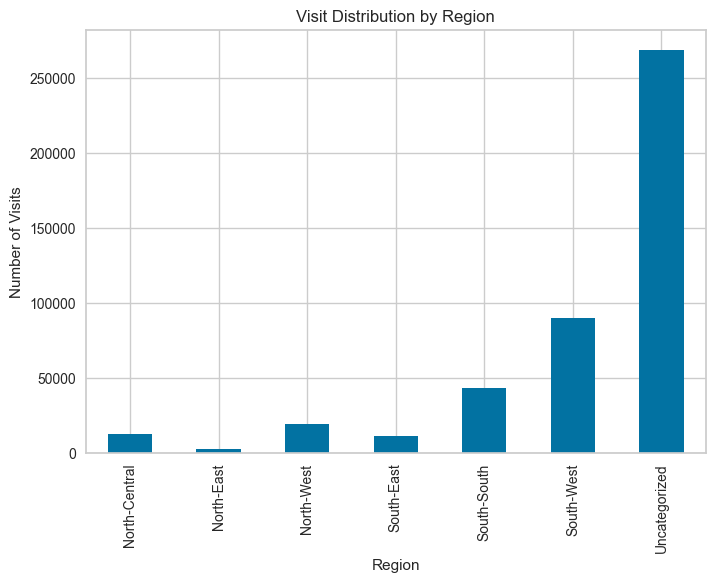

In [18]:
import matplotlib.pyplot as plt

# Plot the regional distribution
region_visit_counts.plot(kind='bar', x='region', y='visit_count', legend=False)
plt.title('Visit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Visits')
plt.show()

In [19]:
# Standardize the 'region' column: strip spaces and convert to lowercase
merged_data['region'] = merged_data['region'].str.strip().str.lower()

# Drop rows where 'region' is 'uncategorized' or 'unknown'
merged_data = merged_data[~merged_data['region'].isin(['uncategorized', 'unknown'])]

# Drop the 'state' column
merged_data = merged_data.drop(columns=['state'])

# Verify the changes
print(f"Remaining rows: {merged_data.shape[0]}")
print(merged_data['region'].unique())  # Check unique values in 'region'
merged_data.head()


Remaining rows: 179730
['north-west' 'south-west' 'south-south' 'north-central' 'south-east'
 'north-east']


,visit_id,patient_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type,dob,sex,institution_id,region
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,1928-06-01,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,1981-07-05,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,2018-12-27,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,1987-09-25,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,1990-07-02,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west


### Address Missing Value for DOB and cleaning

In [21]:
from datetime import datetime
def calculate_age(dob):
    if pd.isnull(dob):
        return None
    today = datetime.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))


merged_data['dob'] = pd.to_datetime(merged_data['dob'], errors='coerce') 
# Recalculate the age column
merged_data['age'] = merged_data['dob'].apply(lambda x: calculate_age(x) if pd.notnull(x) else None)

In [22]:
print( merged_data['age'].unique())
print(merged_data.shape[0])

[ 96  43   5  37  34  14  53  32  35  81  59  44  48  22  30  41  83   8
  31  46  52  36  73   3  26  27  39  45  10  51  57  55  49  38  40  72
   4  79  60  23  86  68  78  33  29  16   9  50  93  20  18   6  13  92
  54  82  42  88  28  65  56  25  12  76  74  21  66  64  70  61  47  84
  62  80  24  58   7  69  17  11  77  75  67  63  15  19  89  85 103  71
  91  90  87   2  95   1  97 102  94  99 108 105  98 106 104 124 100 110
 109  -5 111]
179730


Based on the unique values for age, we observed the presence of negative ages. We need to handle these negative and extreme values.
We handled negative and extreme values in the 'age' column by defining a valid range (0 to 120), removing rows with invalid ages, imputing missing values with the median, converting ages to integers, and dropping the 'dob' column. Verification steps included printing the number of remaining rows and unique age values, and displaying the first few rows of the modified DataFrame.

In [23]:
# Handle Negative and Extreme Values

# Define a valid range for age
valid_age_range = (0, 120)


# Remove rows with invalid ages (outside the valid range)
merged_data = merged_data[(merged_data['age'] >= valid_age_range[0]) & 
                          (merged_data['age'] <= valid_age_range[1])]


# Impute missing values with the median of the column  Median is more robust for skewed data or when outliers exist.
merged_data['age'] = merged_data['age'].fillna(merged_data['age'].median())


# Convert age to integers
merged_data['age'] = merged_data['age'].round().astype(int)


# Drop the 'dob' column
merged_data = merged_data.drop(columns=['dob'])

# Verify the changes
print(f"Remaining rows: {merged_data.shape[0]}")
print(merged_data['age'].unique())  

merged_data.head()

Remaining rows: 179728
[ 96  43   5  37  34  14  53  32  35  81  59  44  48  22  30  41  83   8
  31  46  52  36  73   3  26  27  39  45  10  51  57  55  49  38  40  72
   4  79  60  23  86  68  78  33  29  16   9  50  93  20  18   6  13  92
  54  82  42  88  28  65  56  25  12  76  74  21  66  64  70  61  47  84
  62  80  24  58   7  69  17  11  77  75  67  63  15  19  89  85 103  71
  91  90  87   2  95   1  97 102  94  99 108 105  98 106 104 100 110 109
 111]


,visit_id,patient_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type,sex,institution_id,region,age
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34


In [24]:
def print_unique_values(df, columns):
    for col in columns:
        unique_values = df[col].unique()
        print(f"Unique values in '{col}':")
        for value in unique_values:
            print(f" - {value}")
        print("\n")
        if pd.isnull(value):
            print(" - NaN")
# Specify the columns you want to check
columns_to_check = ['visit_type', 'type', 'sex','region','age']

# Call the function with the merged_data dataframe and the specified columns
print_unique_values(merged_data, columns_to_check)

Unique values in 'visit_type':
 - out-patient
 - in-patient


Unique values in 'type':
 - hospital
 - clinic
 - laboratory


Unique values in 'sex':
 - female
 - male


Unique values in 'region':
 - north-west
 - south-west
 - south-south
 - north-central
 - south-east
 - north-east


Unique values in 'age':
 - 96
 - 43
 - 5
 - 37
 - 34
 - 14
 - 53
 - 32
 - 35
 - 81
 - 59
 - 44
 - 48
 - 22
 - 30
 - 41
 - 83
 - 8
 - 31
 - 46
 - 52
 - 36
 - 73
 - 3
 - 26
 - 27
 - 39
 - 45
 - 10
 - 51
 - 57
 - 55
 - 49
 - 38
 - 40
 - 72
 - 4
 - 79
 - 60
 - 23
 - 86
 - 68
 - 78
 - 33
 - 29
 - 16
 - 9
 - 50
 - 93
 - 20
 - 18
 - 6
 - 13
 - 92
 - 54
 - 82
 - 42
 - 88
 - 28
 - 65
 - 56
 - 25
 - 12
 - 76
 - 74
 - 21
 - 66
 - 64
 - 70
 - 61
 - 47
 - 84
 - 62
 - 80
 - 24
 - 58
 - 7
 - 69
 - 17
 - 11
 - 77
 - 75
 - 67
 - 63
 - 15
 - 19
 - 89
 - 85
 - 103
 - 71
 - 91
 - 90
 - 87
 - 2
 - 95
 - 1
 - 97
 - 102
 - 94
 - 99
 - 108
 - 105
 - 98
 - 106
 - 104
 - 100
 - 110
 - 109
 - 111




In [29]:
# Rename columns
merged_data.rename(columns={'inserted_at': 'patient_record_created_at', 'type': 'facility_type','updated_at': 'patient_record_updated_at'}, inplace=True)

# Verify the changes
print(merged_data.columns)

merged_data.head()

Index(['visit_id', 'patient_id', 'admitted_at', 'discharged_at',
       'patient_record_created_at', 'patient_record_updated_at', 'visit_type',
       'facility_type', 'sex', 'institution_id', 'region', 'age'],
      dtype='object')


,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34


#### Convert columns to datetime format

In [30]:
# Convert columns to datetime format
date_columns = ['admitted_at', 'discharged_at', 'patient_record_created_at', 'patient_record_updated_at']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

# Verify the changes
print(merged_data[date_columns].dtypes)

admitted_at                  datetime64[ns]
discharged_at                datetime64[ns]
patient_record_created_at    datetime64[ns]
patient_record_updated_at    datetime64[ns]
dtype: object


In [31]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179728 entries, 0 to 448603
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   visit_id                   179728 non-null  object        
 1   patient_id                 179728 non-null  object        
 2   admitted_at                8129 non-null    datetime64[ns]
 3   discharged_at              8163 non-null    datetime64[ns]
 4   patient_record_created_at  179728 non-null  datetime64[ns]
 5   patient_record_updated_at  179728 non-null  datetime64[ns]
 6   visit_type                 179728 non-null  object        
 7   facility_type              179728 non-null  object        
 8   sex                        179728 non-null  object        
 9   institution_id             179728 non-null  object        
 10  region                     179728 non-null  object        
 11  age                        179728 non-null  int32   

# Feature Engineering

In [ ]:
# Label Encoding
cat_features=dataset.select_dtypes(include='object').columns

for cat_feature in cat_features:
  dataset[cat_feature] = dataset[cat_feature].astype('category')
  dataset[cat_feature] = dataset[cat_feature].cat.codes


# Read more on Pandas get_dummies

dataset.head()

##### Time-Based Features

In [32]:
# Length of stay
merged_data['length_of_stay'] = (pd.to_datetime(merged_data['discharged_at']) - 
                                 pd.to_datetime(merged_data['admitted_at'])).dt.days

# Print the number of NaN values before fillna
print(f"Number of NaN values before fillna: {merged_data['length_of_stay'].isna().sum()}")

# Fill NaN length_of_stay with 0 for non-in-patient visits
merged_data['length_of_stay'] = merged_data['length_of_stay'].fillna(0)

# Print the number of NaN values after fillna
print(f"Number of NaN values after fillna: {merged_data['length_of_stay'].isna().sum()}")

# Remove the dot and convert to integers
merged_data['length_of_stay'] = merged_data['length_of_stay'].astype(int)

# Handle -1 values
median_length_of_stay = merged_data['length_of_stay'][merged_data['length_of_stay'] != -1].median()
merged_data['length_of_stay'] = merged_data['length_of_stay'].replace(-1, median_length_of_stay)


print(merged_data['length_of_stay'].unique())

merged_data.head()

Number of NaN values before fillna: 171620
Number of NaN values after fillna: 0
[  0   2   1   5  12   6   4   3   7   8  23   9  80 148  35 315  13  21
  11 172  10  16  92  98  27  29  99  82  46  40 132  34  15 588 129  26
  18  19  17  25 126  14  47  28  63  68  90  30  50 102 119  58 103  31
  24  48  20  42  59  38  81  62  45  49  44  91 111  51  36  41  32 184
 213 201  33  22  54  37 178  39 140 188  65 134 143 190 202 174  79 160
 170  77  89  56 150 154 180 155  67 161  76  57 149 158 177  69 130 114
 138 117 131 101 210 141  84  88 118  72  71 123 189  93  55  61 147  43
  74 285  78  73  83]


,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age,length_of_stay
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96,0
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43,0
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5,0
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37,0
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34,0


In [33]:

merged_data['number_of_updates'] = merged_data.groupby('patient_id')['patient_record_updated_at'].transform('count').astype(int)
print(merged_data['number_of_updates'].unique())
merged_data.head()

[ 11   5   7   6   4   2  17   3  18   1  12  25  14   8  10   9  62  16
  61  13  15  31  21  19  33  20  24  23  39 156  56  27  45  47  41  26
  22  29  34  28  30  32  35 117  48  38  36  46  37  40  55 111  73  97
  84  82  59  78  52  64  42  44  53  99  43  50  60  69  68  70  49]


,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age,length_of_stay,number_of_updates
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96,0,11
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43,0,5
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5,0,7
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37,0,6
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34,0,4


#### Demographic Features

In [34]:
# Define corrected age bins and labels
bins = [0, 13, 20, 35, 60, 120]  # Define bin edges
labels = ['child', 'adolescent', 'young adult', 'adult', 'senior']  # Define labels

# Create the age_group column with updated bins
merged_data['age_group'] = pd.cut(
    merged_data['age'], bins=bins, labels=labels, include_lowest=True, right=False
)

# Verify the unique values in the new column
print(merged_data['age_group'].value_counts())

# Handle missing or invalid ages
merged_data = merged_data[(merged_data['age'] >= 0) & (merged_data['age'] <= 120)]
merged_data['age'] = merged_data['age'].fillna(merged_data['age'].median())

merged_data['sex_binary'] = merged_data['sex'].map({'male': 0, 'female': 1})
print(merged_data['sex_binary'].unique())
merged_data.head()

adult          76367
young adult    42428
senior         27222
child          25018
adolescent      8693
Name: age_group, dtype: int64
[1 0]


,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age,length_of_stay,number_of_updates,age_group,sex_binary
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96,0,11,senior,1
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43,0,5,adult,1
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5,0,7,child,1
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37,0,6,adult,1
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34,0,4,young adult,1


#### Geographical Features

In [35]:
# Geographical Features
merged_data['region_count'] = merged_data.groupby(['patient_id', 'region']).cumcount() + 1
print(merged_data['region_count'].unique())
merged_data['institution_count'] = merged_data.groupby(['patient_id', 'institution_id']).cumcount() + 1
print(merged_data['institution_count'].unique())

merged_data.head()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 

,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age,length_of_stay,number_of_updates,age_group,sex_binary,region_count,institution_count
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96,0,11,senior,1,1,1
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43,0,5,adult,1,1,1
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5,0,7,child,1,1,1
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37,0,6,adult,1,1,1
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34,0,4,young adult,1,1,1


#### Visit-Related Features

In [36]:
merged_data['total_visits'] = merged_data.groupby('patient_id')['visit_id'].transform('count')
merged_data['facility_type_count'] = merged_data.groupby(['patient_id', 'facility_type']).cumcount() + 1


print(merged_data['total_visits'].unique())
print(merged_data['facility_type_count'].unique())

merged_data.head()

[ 11   5   7   6   4   2  17   3  18   1  12  25  14   8  10   9  62  16
  61  13  15  31  21  19  33  20  24  23  39 156  56  27  45  47  41  26
  22  29  34  28  30  32  35 117  48  38  36  46  37  40  55 111  73  97
  84  82  59  78  52  64  42  44  53  99  43  50  60  69  68  70  49]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]


,visit_id,patient_id,admitted_at,discharged_at,patient_record_created_at,patient_record_updated_at,visit_type,facility_type,sex,institution_id,region,age,length_of_stay,number_of_updates,age_group,sex_binary,region_count,institution_count,total_visits,facility_type_count
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,NaT,NaT,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital,female,4850e9c9-2945-4087-b4f9-6c302e44b84e,north-west,96,0,11,senior,1,1,1,11,1
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,NaT,NaT,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,43,0,5,adult,1,1,1,5,1
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,NaT,NaT,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital,female,b05bec66-9c3b-4381-9ad2-0636481ca919,south-west,5,0,7,child,1,1,1,7,1
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,NaT,NaT,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital,female,f7427dbb-e87d-4ed2-b168-136c244596b2,south-west,37,0,6,adult,1,1,1,6,1
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,NaT,NaT,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital,female,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,south-west,34,0,4,young adult,1,1,1,4,1


In [37]:
# Drop the specified columns
columns_to_drop = ['institution_id', 'visit_id', 'patient_id', 'admitted_at', 'discharged_at', 'patient_record_created_at', 'patient_record_updated_at']
merged_data.drop(columns=columns_to_drop, inplace=True)

# Separate numeric columns from object columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns.tolist()
object_columns = merged_data.select_dtypes(include=[object]).columns.tolist()

print("Numeric columns:", numeric_columns)
print("Object columns:", object_columns)

merged_data.head()

Numeric columns: ['age', 'length_of_stay', 'number_of_updates', 'sex_binary', 'region_count', 'institution_count', 'total_visits', 'facility_type_count']
Object columns: ['visit_type', 'facility_type', 'sex', 'region']


,visit_type,facility_type,sex,region,age,length_of_stay,number_of_updates,age_group,sex_binary,region_count,institution_count,total_visits,facility_type_count
0,out-patient,hospital,female,north-west,96,0,11,senior,1,1,1,11,1
1,out-patient,hospital,female,south-west,43,0,5,adult,1,1,1,5,1
2,out-patient,hospital,female,south-west,5,0,7,child,1,1,1,7,1
3,out-patient,hospital,female,south-west,37,0,6,adult,1,1,1,6,1
4,out-patient,hospital,female,south-west,34,0,4,young adult,1,1,1,4,1


# Data scaling, Outlier detection and Correlation Analysis

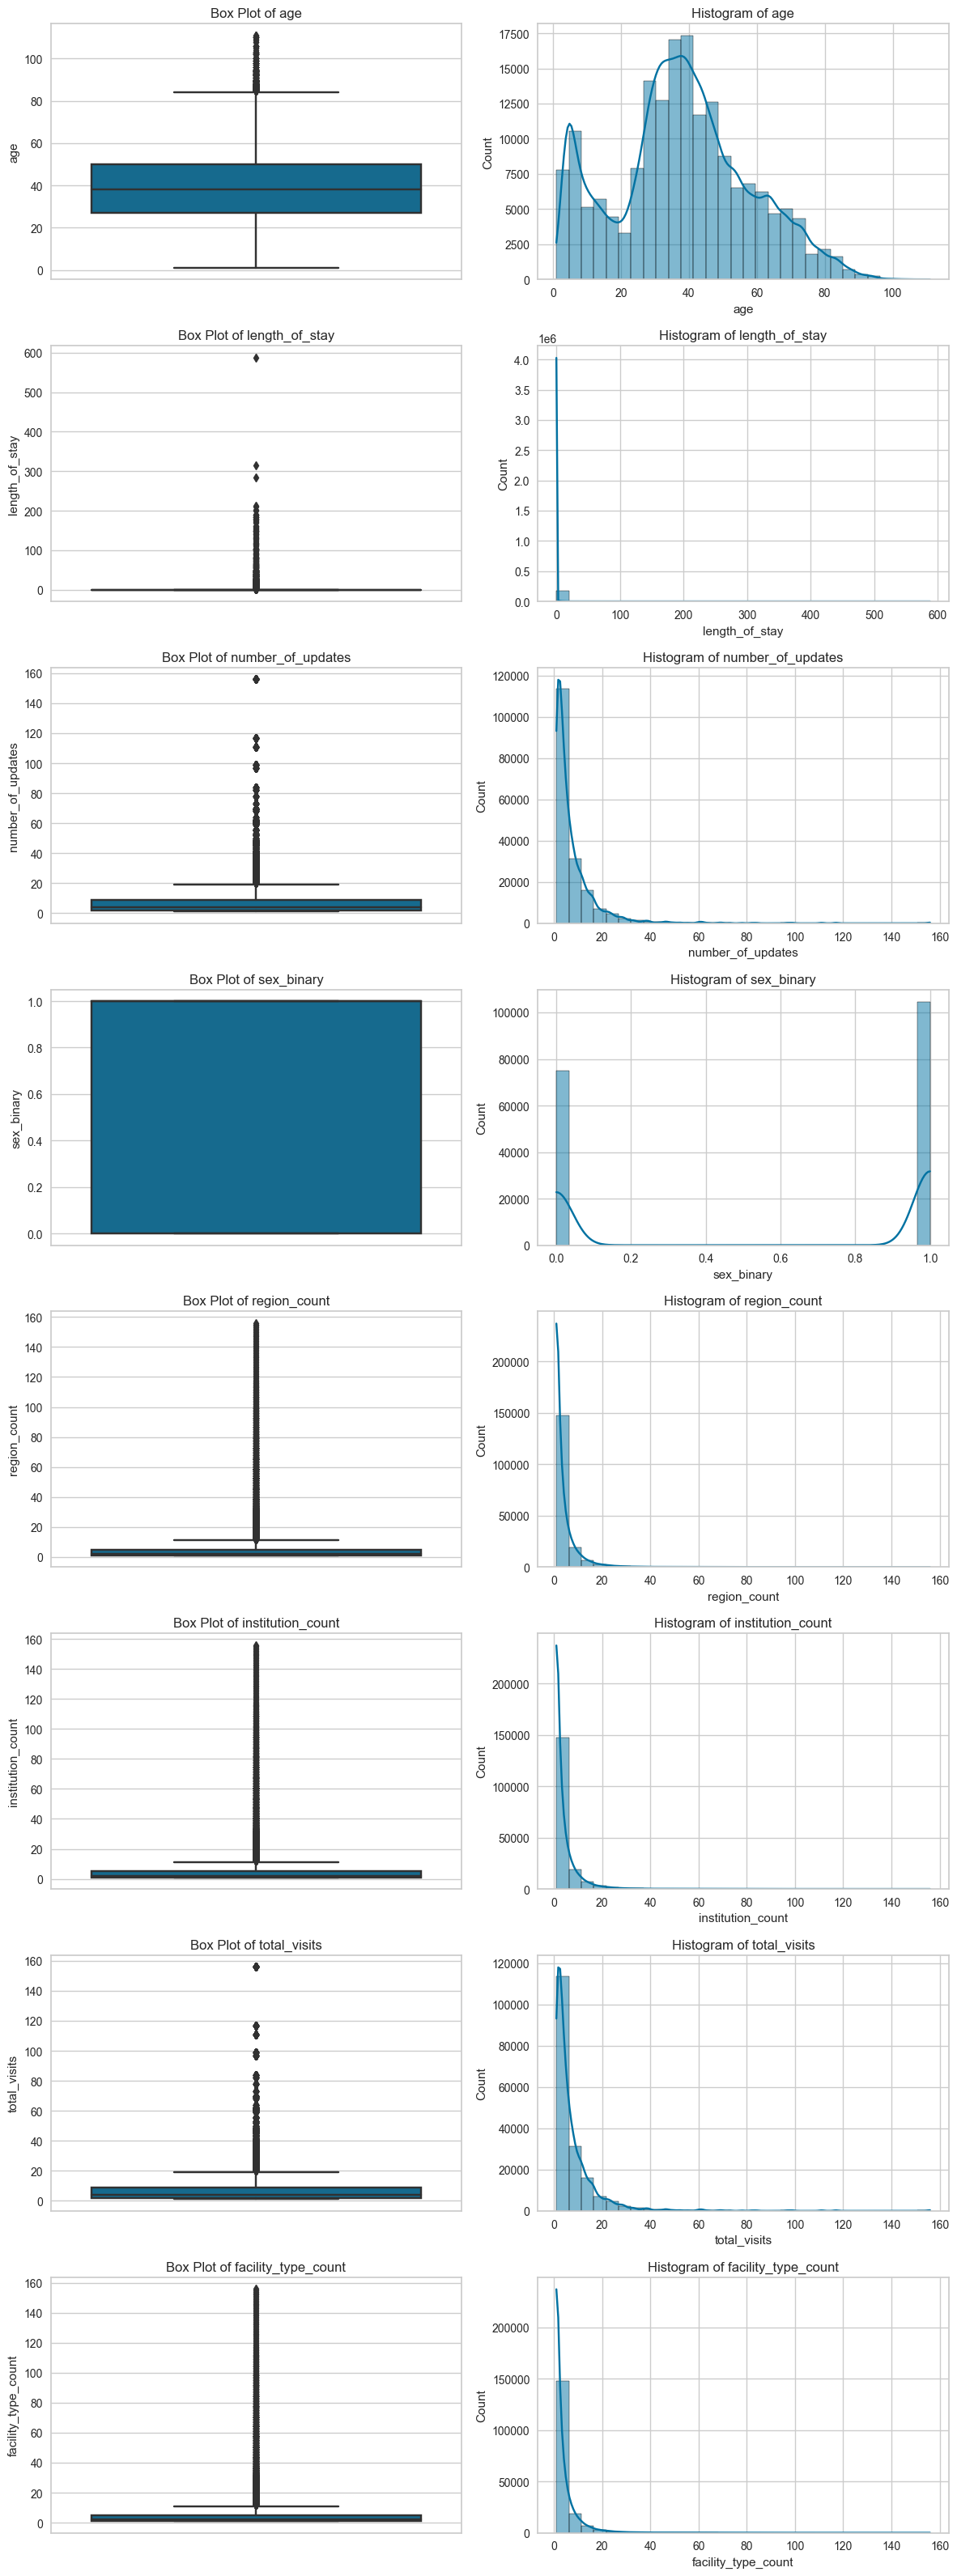

In [38]:
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 4 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
  # Box plot
  sns.boxplot(y=merged_data[col], ax=axes[i, 0])
  axes[i, 0].set_title(f'Box Plot of {col}')
  axes[i, 0].set_ylabel(col)

  # Histogram
  sns.histplot(merged_data[col], ax=axes[i, 1], bins=30, kde=True)
  axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

### Observations
- Many features show right-skewed distributions, meaning most values are concentrated near the lower end, with a long tail of higher values.
- Outliers are present in nearly all features, particularly in `length_of_stay`, `region_count`, `institution_count`, and `total_visits`.

### Next Steps
1. Handle Outliers
2. Transform Skewed Features
3. Data Scaling
4. Correlation Analysis

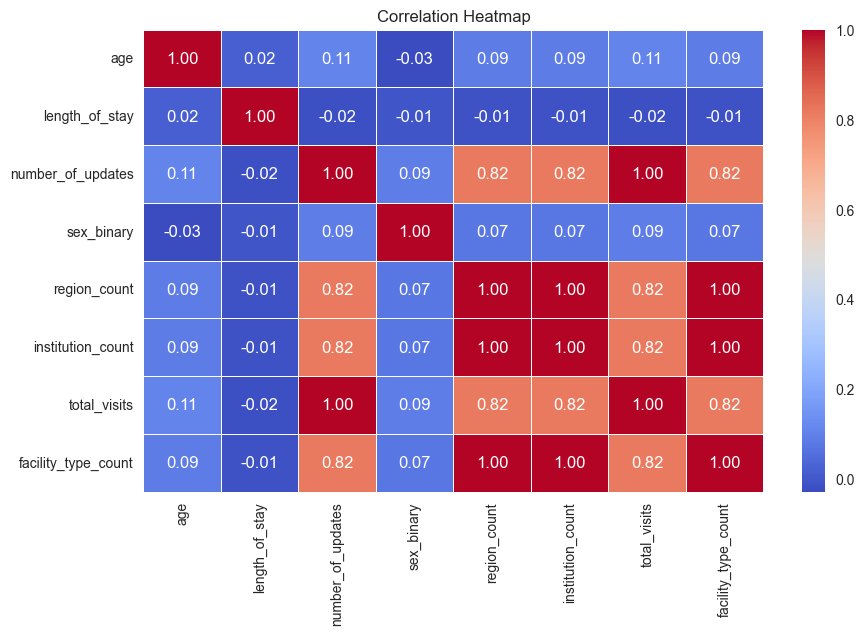

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), fmt='.2f', annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Insights

**Redundancy:**
- The features `region_count`, `institution_count`, `facility_type_count`, and `total_visits` show strong correlations with one another. This redundancy indicates the potential risk of multicollinearity, which can reduce model performance. Proper feature selection or dimensionality reduction is necessary.

**Predictive Relationships:**
- The feature `total_visits` demonstrates moderate-to-strong correlations with `region_count`, `institution_count`, and `facility_type_count`. These relationships suggest that these features are good predictors and are critical for modeling resource demand.

**Independent Features:**
- The feature `age` is relatively independent, with weak correlations with other features. However, its slight correlation with `total_visits` makes it a valuable inclusion for modeling.

**Weak Predictors:**
- Features such as `length_of_stay` and `sex_binary` exhibit negligible correlations with most other features. Their impact on predictions may be limited but could still contribute marginally to the model’s performance.

### Next Steps

**Feature Selection:**
- Drop `number_of_updates`, as it is perfectly correlated with `total_visits` and adds no unique value.
- From the highly correlated features (`region_count`, `institution_count`, `facility_type_count`), retain only one feature. For this analysis, `region_count` will be retained as a representative feature.

**Dimensionality Reduction:**
- Apply dimensionality reduction techniques such as Principal Component Analysis (PCA) or use regularization techniques like Lasso regression to manage multicollinearity and improve model robustness.

**Modeling Approach:**
- Focus on `total_visits`, `age`, and one or two of the correlated features (e.g., `region_count`) as primary predictors.
- Test the inclusion of weak predictors (`length_of_stay`, `sex_binary`) to evaluate if they add marginal improvements to the model's performance.

By addressing redundancy and emphasizing predictive relationships, the refined feature set will enhance the model's interpretability and accuracy. Further steps will include encoding categorical features, scaling numerical features, and splitting the dataset for model training and evaluation.

In [41]:
# Features to drop
redundant_features = ['number_of_updates', 'institution_count', 'facility_type_count']

# Drop redundant features
filtered_data = merged_data.drop(columns=redundant_features)

# Verify the resulting dataset
print(f"Remaining features: {filtered_data.columns.tolist()}")
print(f"Dataset shape after dropping redundant features: {filtered_data.shape}")


Remaining features: ['visit_type', 'facility_type', 'sex', 'region', 'age', 'length_of_stay', 'age_group', 'sex_binary', 'region_count', 'total_visits']
Dataset shape after dropping redundant features: (179728, 10)


# Modeling With Pycaret

Before setting up PyCaret, a random sample of 10% size of the dataset will be get to make predictions with unseen data. 

In [ ]:

data = merged_data.sample(frac=0.9, random_state=RANDOM_SEED)
data_unseen = merged_data.drop(data.index)

# Reset the index
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# Dropping the 'total_visits' column from the unseen data cos it our target variable
data_unseen.drop(columns=['total_visits'],inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('columns: ' + str(data.columns))
print("-----------------------------------------------------------")
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('columns: ' + str(data.columns))

Data for Modeling: (161755, 13)
columns: Index(['visit_type', 'facility_type', 'sex', 'region', 'age', 'length_of_stay',
       'number_of_updates', 'age_group', 'sex_binary', 'region_count',
       'institution_count', 'total_visits', 'facility_type_count'],
      dtype='object')
-----------------------------------------------------------
Unseen Data For Predictions: (17973, 13)
columns: Index(['visit_type', 'facility_type', 'sex', 'region', 'age', 'length_of_stay',
       'number_of_updates', 'age_group', 'sex_binary', 'region_count',
       'institution_count', 'total_visits', 'facility_type_count'],
      dtype='object')


The PyCaret's setup is made with 90% of data samples and just use one function (`setup`) from the module.<br>
It's possible configure with variuos options, as data pre-processing, feature engineering, etc. The easy and efficient of PyCaret buy a lot of time when prototyping models.<br>
Each setup is an experiment and for this problem, is used the following options:
* Normalization of the numerical features with Z-Score.
* Feature Selection with permutation importance techniques.
* Outliers Removal.
* Features Removal based on Multicollinearity.
* Features Scalling Transformation.
* Ignore low variance on Features.
* PCA for Dimensionality Reduction, as the dataset has many features.
* Numeric binning on the features 
* 70% of samples for Train and 30% for test.
* Fix Imbalance with SMOTE.
* The models will store their metric results via Mlflow, to acess Mlflow UI, type mlflow on the your cmd or !mlflow ui on a cell on the bottom of this notebook. 

In [ ]:
import os 

DAGSHUB_USER_NAME = 'oluwaseyi.gbadamosi'
DAGSHUB_TOKEN =  '26b5587e3fdc78a880d1041a5d994add93082d7d'
DAGSHUB_REPO_OWNER = 'oluwaseyi.gbadamosi'
MLFLOW_EXPERIMENT_NAME = 'seyi-eperiment'
DAGSHUB_REPO_NAME='cdal-churn-product'

os.environ['MLFLOW_TRACKING_USERNAME'] = DAGSHUB_USER_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = DAGSHUB_TOKEN
os.environ['MLFLOW_TRACKING_URI'] = f'https://dagshub.com/{DAGSHUB_REPO_OWNER}/{DAGSHUB_REPO_NAME}.mlflow'
mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])
os.environ['MLFLOW_EXPERIMENT_NAME'] = MLFLOW_EXPERIMENT_NAME


In [ ]:
exp01 = setup(data=data, 
              target="churn", 
              session_id=RANDOM_SEED, 
              normalize=True,
              feature_selection=True, 
              remove_outliers=True,
              remove_multicollinearity=True,
              fix_imbalance=True, 
              transformation=True,
              bin_numeric_features=["age"],
              silent=True,
              log_experiment=True,
              log_data=True,
              log_plots=True,
              experiment_name ='/MLFLOW-REPO/seyi-eperiment',
  
                )

PyCaret shows at first if all features types are with it correspondent type, if everything is right, press enter on the blank bar and the setup is finished showing a summary of the experiment. 

#### Compare Models
This section utilizes PyCaret's `compare_models` function to evaluate and compare the performance of multiple machine learning models on the given dataset.The function ranks the models based on their performance metrics, helping to identify the best model for the task.

In [ ]:
top_model = compare_models(fold=K_FOLDS,
                            sort="F1",
                            n_select=1,
                            include=["gbc","lightgbm","xgboost","rf","et"]
                            )

#### tune model